# Zadanie 1

Za pomoca funkcji 

```python
sklearn.datasets.make_moons
```

wygeneruj 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


In [3]:
import numpy as np
import sklearn.datasets

#low noise, plenty of samples, should be easy
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=.05)

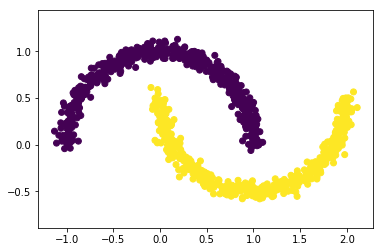

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

# Zadanie 2

Do równania prostej w postaci ogólnej

$$
Ax + By + C = 0
$$

łatwo znaleść współrzedne wektora prostopadłego do wykresu

$$
W = [A,B].
$$

Łatwo policzyć, że dla funkcji

$$
y = ax+b
$$

mamy

$$
A=-a, B=1, C=-b
$$

Dla danych z poprzedniego zadania narysuj dowolna prosta przchodzcą przez środek układu współrzednych i dokonaj klasyfikacji.
Dane po lewej stronie mają być oznaczone jako -1 a prawej jako +1. Użyj iloczynu skalarnego oraz wektora normalnego do prostej.

Narysuj odpowiedni rysunek.

In [21]:
a=0.5
b=0

A=-a
B=1
C=-b

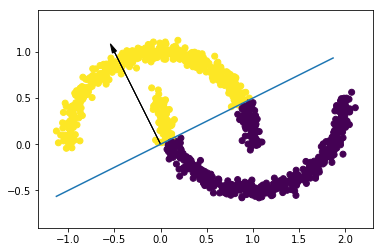

In [22]:
x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.5)
yx = a*x+b
plt.arrow(0, b, A, B, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.plot(x, yx)

y_cl=np.sign(np.dot( X, np.array([A,B]))+C)
y_cl[y_cl==-1]=0   

plt.scatter(X[:, 0], X[:, 1], c=y_cl)
plt.axis('equal')
plt.show()

# Zadanie 3
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

In [23]:
class fixed_plan(object):
    """
    """
    def __init__(self, a=0.5, b=0):
        self.a=a
        self.b=b

        self.A=-self.a
        self.B=1
        self.C=-self.b

    def fit(self, X, y):
        return self
    
    def predict(self, X):
        """Return class label after unit step"""
        y_cl=np.sign(np.dot( X, np.array([self.A,self.B]))+self.C)
        y_cl[y_cl==-1]=0
        return y_cl 

In [34]:
from matplotlib.colors import ListedColormap

def sub_plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # plot all samples
    X_test, y_test = X, y
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    plt.axis('equal')
    plt.show()

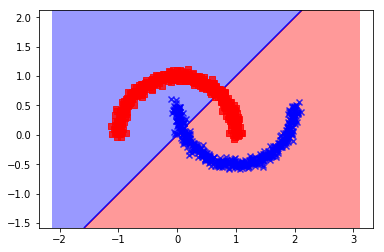

In [35]:
classifier=fixed_plan(a=1,b=0)
classifier.fit(X,y)
sub_plot_decision_regions(X, y, classifier, resolution=0.02)